# DEMO 4.2: **Đánh giá mô hình HỒI QUY**
<u>Nội dung</u>:
1. Đánh giá phương pháp hồi quy tuyến tính
2. Cross-validation

<u>Cập nhật</u>: **09/2025**




---
### **MÔI TRƯỜNG TRIỂN KHAI ỨNG DỤNG**
---

In [ ]:
## Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Edu/1. UEH/Machine Learning/Demo/Ch4 - Danh gia giai phap'

Mounted at /content/gdrive


In [ ]:
## Thư viện
import joblib                 as jlb
import matplotlib.pyplot      as plt
import numpy                  as np
import pandas                 as pd
import seaborn                as sbn

from sklearn.linear_model     import LinearRegression
from sklearn.metrics          import mean_absolute_error, mean_squared_error
from sklearn.model_selection  import train_test_split

---
## 1. **Đánh giá phương pháp hồi quy tuyến tính**
---

In [ ]:
## Mở tập tin dữ liệu
data = pd.read_csv(folder + '/Data/mtcars.csv')

In [ ]:
## Mô hình hóa dữ liệu
X = data.wt
y = data.mpg

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)

In [ ]:
## Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X = pd.DataFrame(X_train), y = y_train)

In [ ]:
## Kiểm thử mô hình
y_pred = model.predict(pd.DataFrame(X_test))

In [ ]:
## Hàm tính toán các chỉ số MAE, MSE
def regression_eval(y_test, y_pred):
    mae  = mean_absolute_error(y_pred, y_test)
    mse  = mean_squared_error(y_pred, y_test)
    return mae, mse

In [ ]:
## Đánh giá mô hình hồi quy bằng các chỉ số
errors   = regression_eval(y_test, y_pred)
r2_total = model.score(pd.DataFrame(X), y)
r2_train = model.score(pd.DataFrame(X_train), y_train)
r2_test  = model.score(pd.DataFrame(X_test),  y_test)

## Hiển thị giá trị các chỉ số
print(f'MAE = {errors[0]:.1f}%')
print(f'MSE = {errors[1]:.1f}%')
print(f'R2_Total giải thích được {(r2_total * 100):.1f}% toàn bộ dữ liệu')
print(f'R2_Train giải thích được {(r2_train * 100):.1f}% training set')
print(f'R2_Test  giải thích được {(r2_test  * 100):.1f}% test set')

MAE = 3.6%
MSE = 16.4%
R2_Total giải thích được 73.9% toàn bộ dữ liệu
R2_Train giải thích được 72.7% training set
R2_Test  giải thích được 72.0% test set


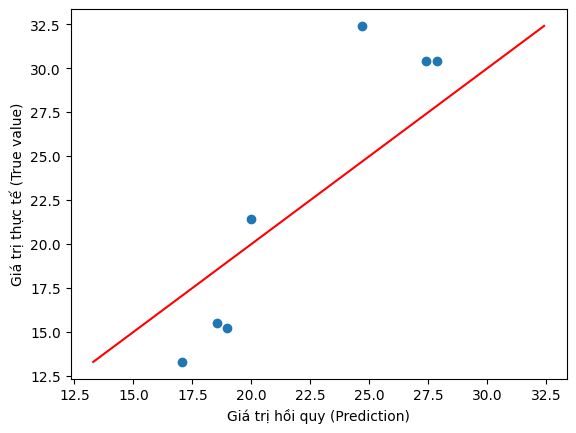

In [ ]:
##------------------------------------------------------------------------------
## Biểu diễn trực quan
##------------------------------------------------------------------------------
x_min, x_max = min(model.predict(pd.DataFrame(X_test))), max(model.predict(pd.DataFrame(X_test)))
y_min, y_max = min(y_test), max(y_test)
lower, upper = min(x_min, y_min), max(x_max, y_max)

plt.scatter(model.predict(pd.DataFrame(X_test)), y_test)
plt.xlabel('Giá trị hồi quy (Prediction)')
plt.ylabel('Giá trị thực tế (True value)')
plt.plot([lower, upper], [lower, upper], color = 'red') # đường phân giác
plt.show()

---
## 2. **Cross-validation**
---